### Import packages & modules & file


In [ ]:
from google.colab import drive
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
default_figsize = plt.rcParamsDefault['figure.figsize']
plt.rcParams['figure.figsize'] = default_figsize

In [ ]:
# folder_link = "https://drive.google.com/file/d/1BzRf7cf-gbbQeYJSKJTV1OtSpAPu7RRQ/view?usp=sharing"
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Coding Projects/Python/Netflix/Netflix_Userbase.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


### Data Overview

In [ ]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [ ]:
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


### Data Visusalisation

#### Single Variable

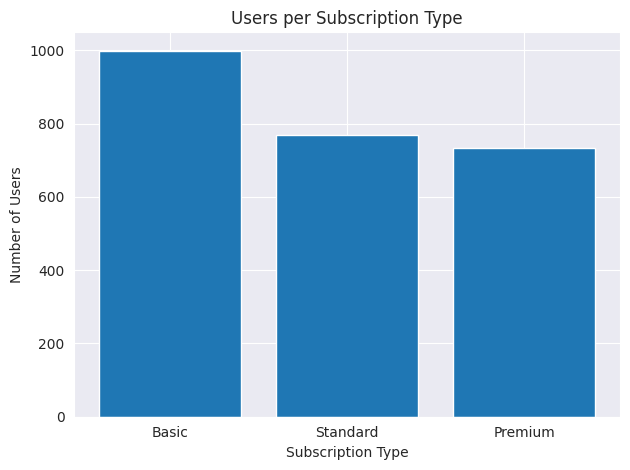

In [ ]:
subs_counts = df['Subscription Type'].value_counts()
plt.bar(subs_counts.index, subs_counts.values)

plt.xlabel('Subscription Type')
plt.ylabel('Number of Users')
plt.title('Users per Subscription Type')

plt.tight_layout()
plt.show()

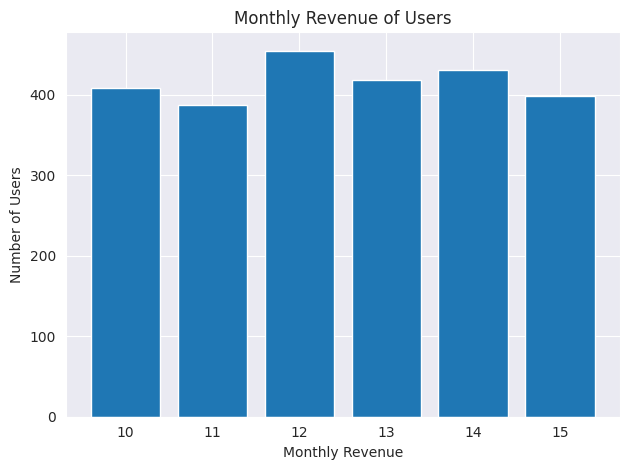

In [ ]:
monthly_revenue_count = df['Monthly Revenue'].value_counts()
plt.bar(monthly_revenue_count.index, monthly_revenue_count.values)

plt.xlabel('Monthly Revenue')
plt.ylabel('Number of Users')
plt.title('Monthly Revenue of Users')

plt.tight_layout()
plt.show()

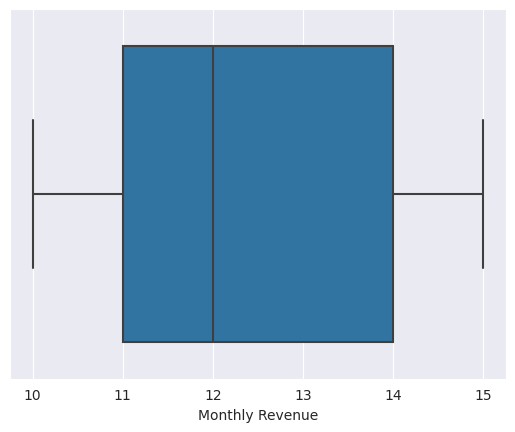

In [ ]:
sns.boxplot(x=df["Monthly Revenue"])
plt.show()

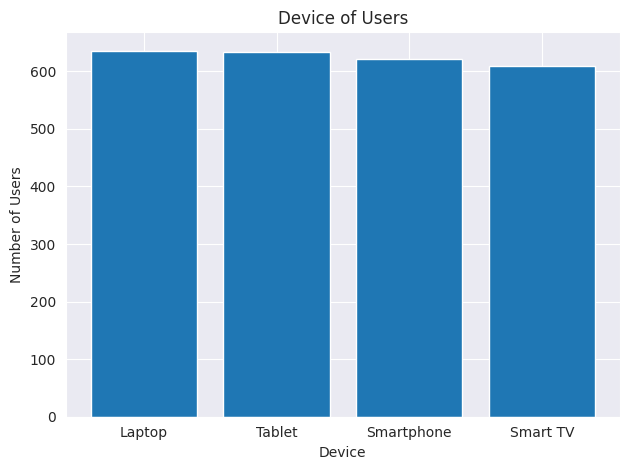

In [ ]:
device_counts = df['Device'].value_counts()
plt.bar(device_counts.index, device_counts.values)

plt.xlabel('Device')
plt.ylabel('Number of Users')
plt.title('Device of Users')

plt.tight_layout()
plt.show()

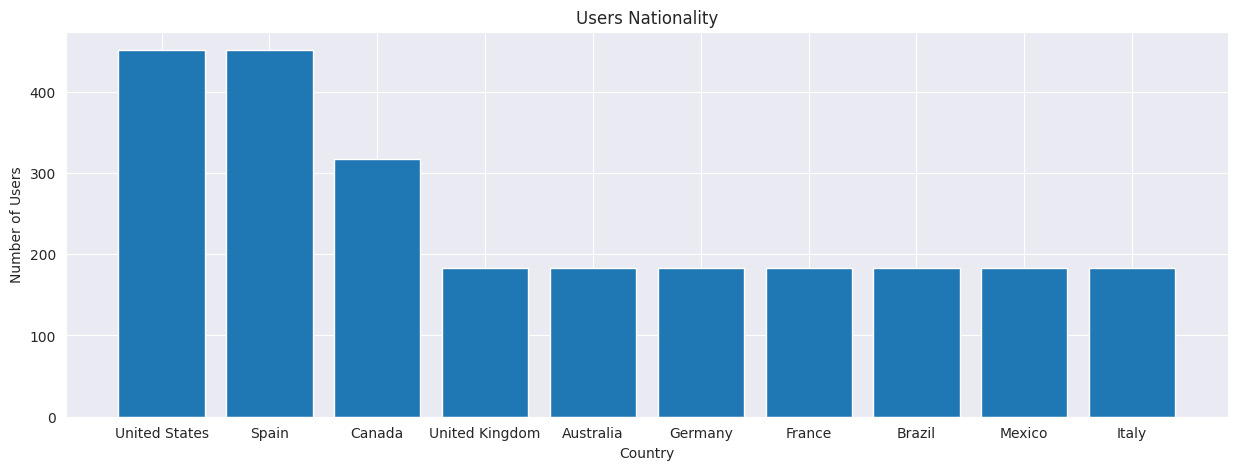

In [ ]:
country_counts = df['Country'].value_counts()
plt.bar(country_counts.index, country_counts.values)

plt.rcParams['figure.figsize'] = [15, 5]

plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.title('Users Nationality')

plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = default_figsize

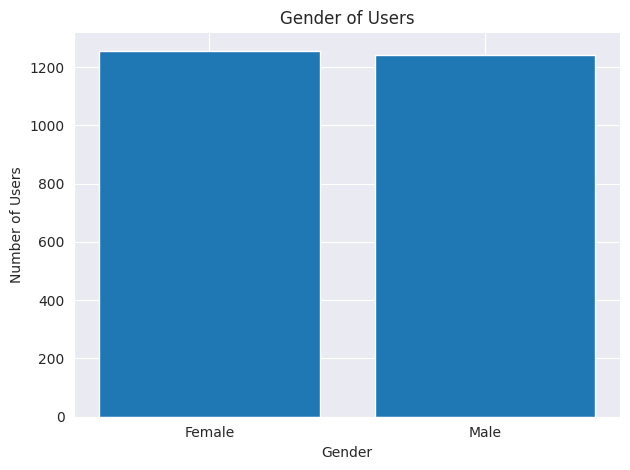

In [ ]:
gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)

plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.title('Gender of Users')

plt.tight_layout()
plt.show()

(-1.0999999976085273,
 1.0999999998861203,
 -1.0999999974577392,
 1.0999999995595882)

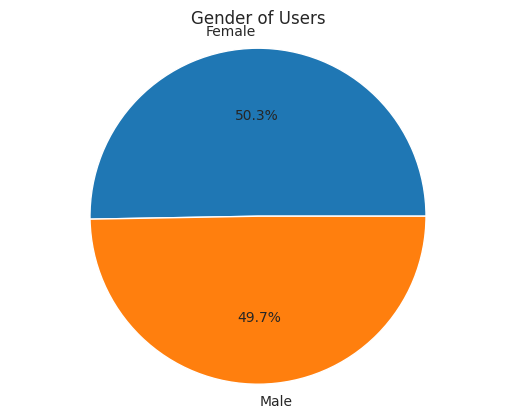

In [ ]:
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender of Users')
plt.axis('equal')

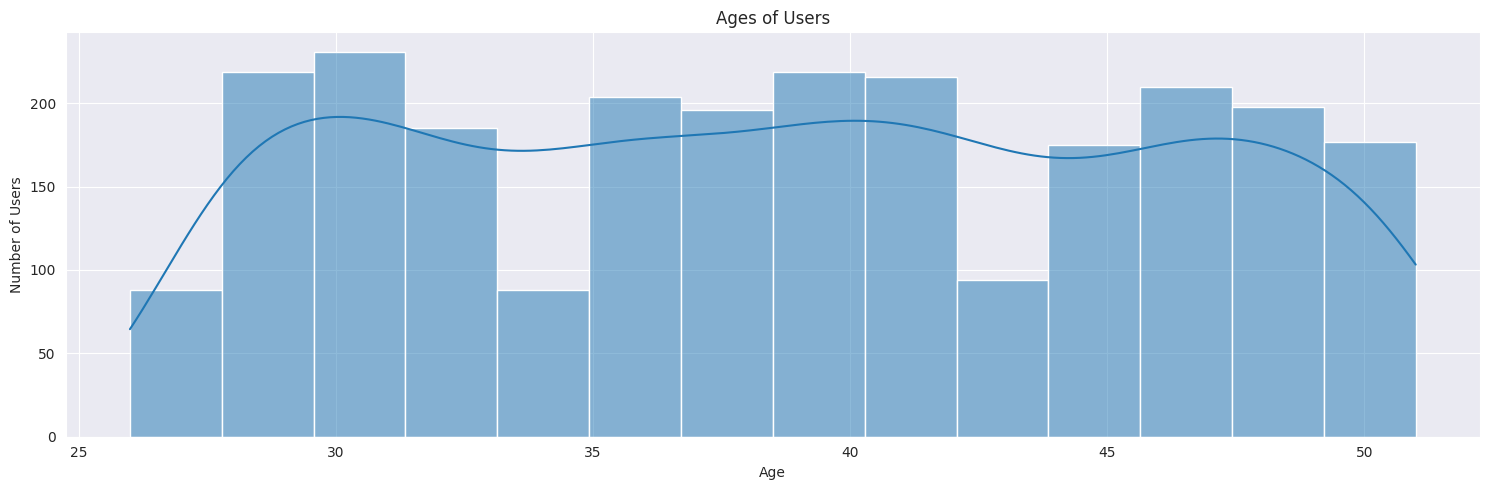

In [ ]:
sns.histplot(x=df['Age'], kde=True)

plt.ylabel('Number of Users')
plt.title('Ages of Users')

plt.tight_layout()
plt.show()

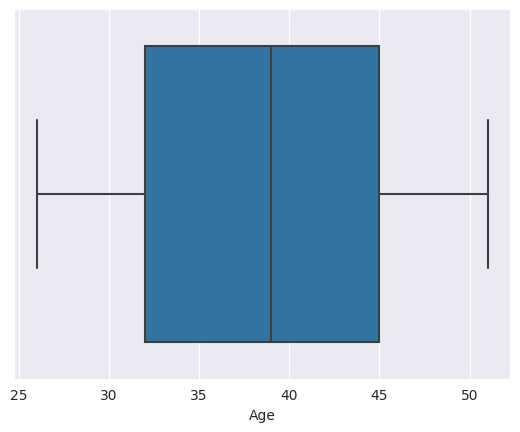

In [ ]:
sns.boxplot(x=df["Age"])
plt.show()

#### Two Variables

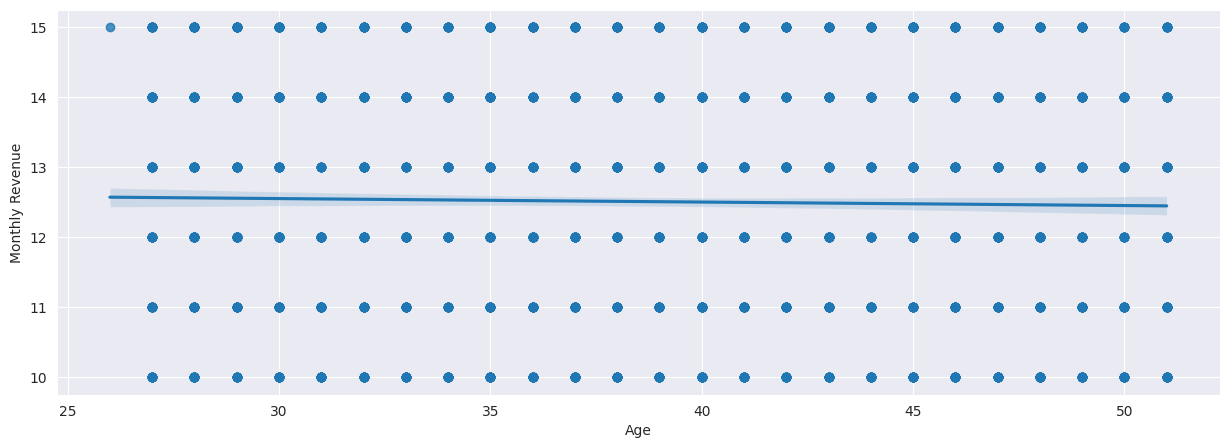

In [ ]:
sns.regplot(x = df['Age'], y = df['Monthly Revenue'])

<Axes: xlabel='Age', ylabel='Monthly Revenue'>

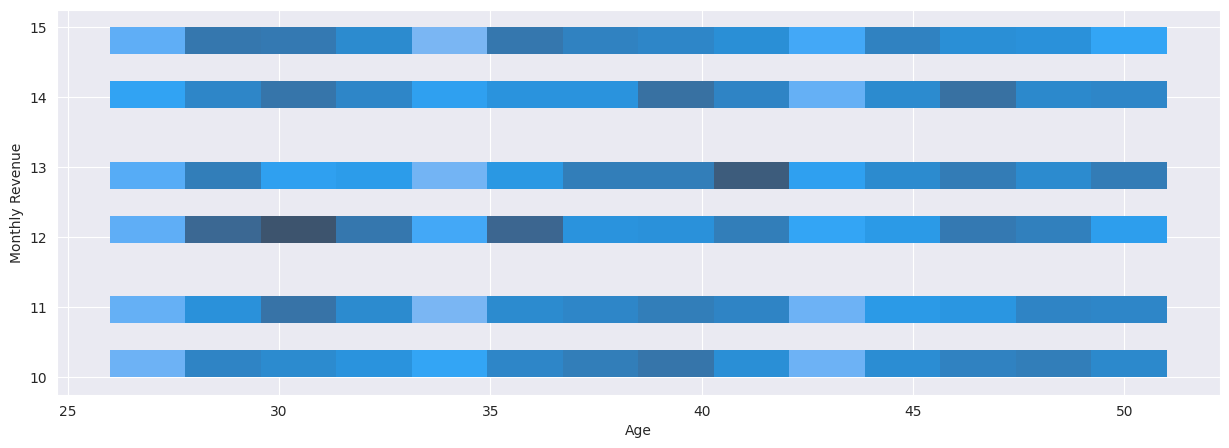

In [ ]:
sns.histplot(df, x='Age', y='Monthly Revenue')

<Axes: xlabel='Age', ylabel='Count'>

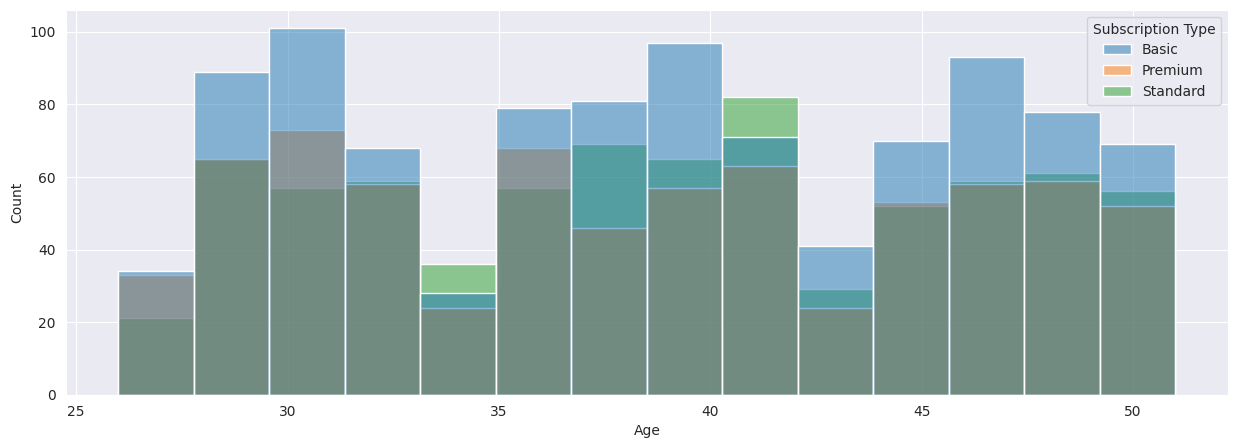

In [ ]:
sns.histplot(df, x='Age', hue='Subscription Type')

<Axes: xlabel='Age', ylabel='Count'>

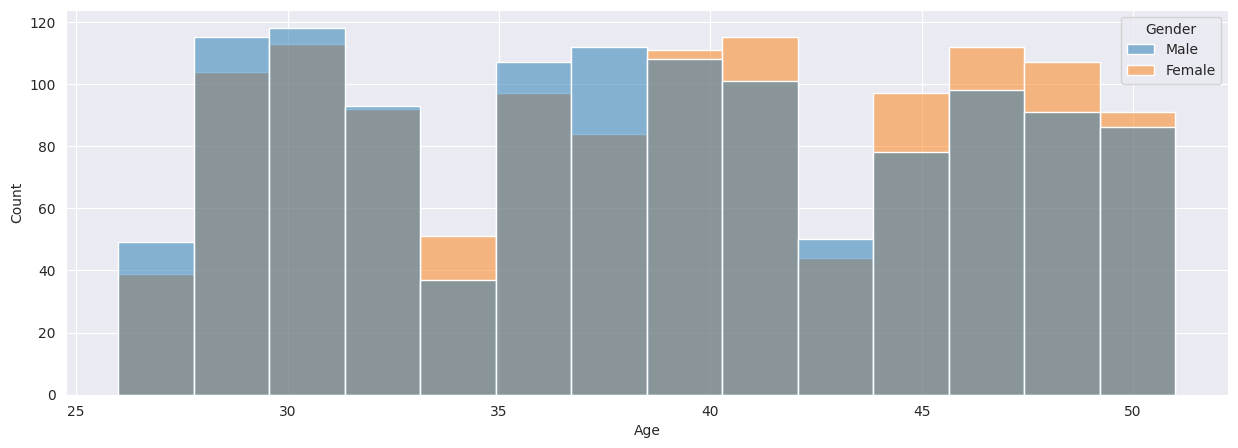

In [ ]:
sns.histplot(df, x='Age', hue='Gender')

<Axes: xlabel='Age', ylabel='Count'>

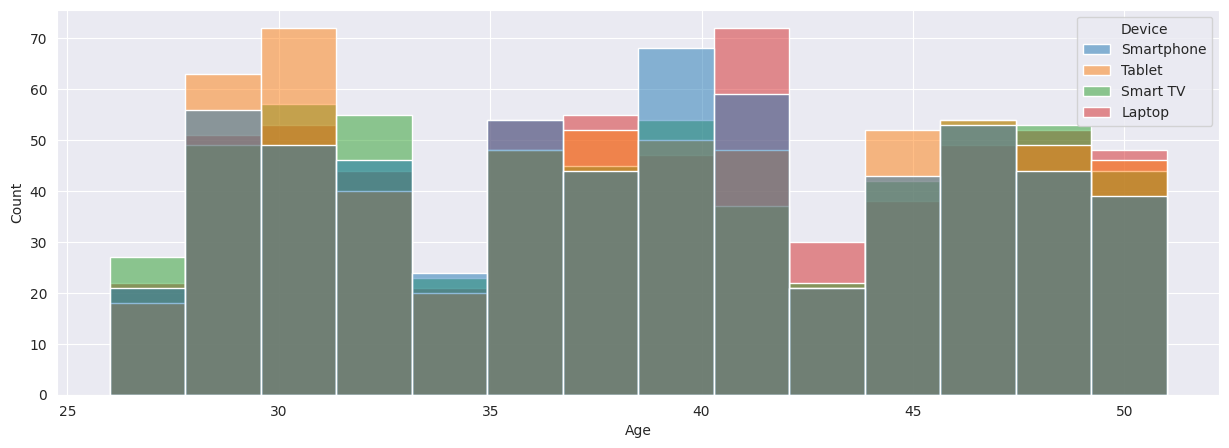

In [ ]:
sns.histplot(df, x='Age', hue='Device')

<Axes: xlabel='Gender', ylabel='Count'>

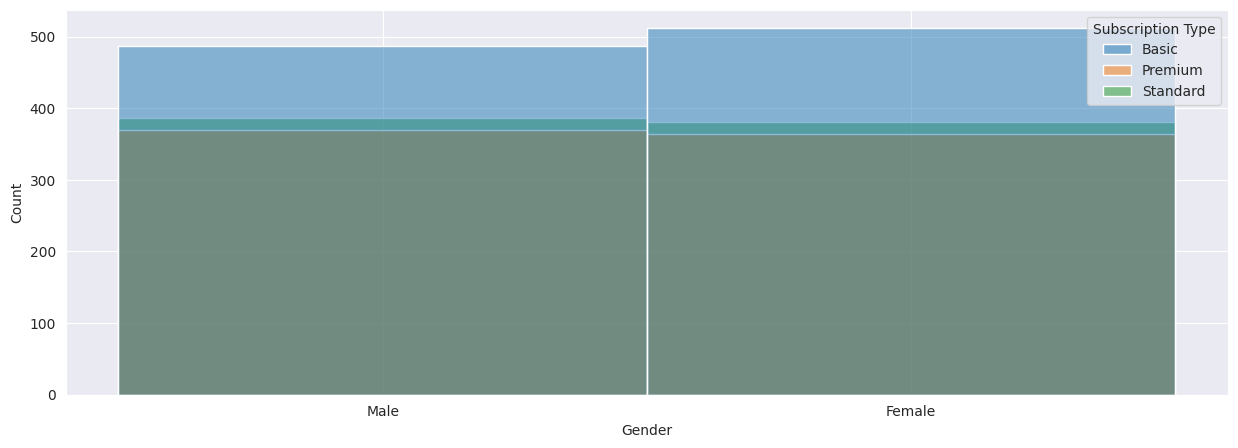

In [ ]:
sns.histplot(df, x='Gender', hue='Subscription Type')

<Axes: xlabel='Gender', ylabel='Count'>

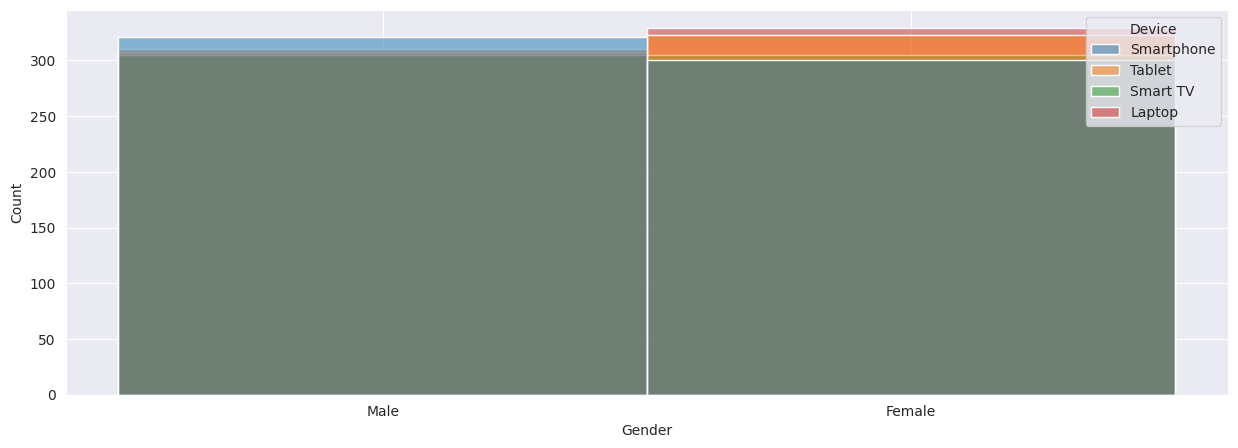

In [ ]:
sns.histplot(df, x='Gender', hue='Device')

<Axes: xlabel='Monthly Revenue', ylabel='Count'>

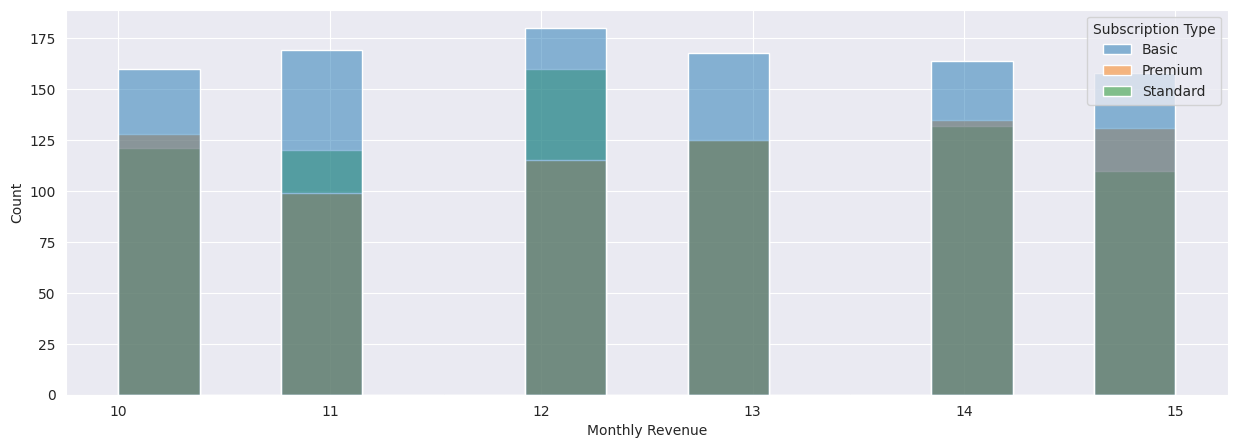

In [ ]:
sns.histplot(df, x='Monthly Revenue', hue='Subscription Type')

<Axes: xlabel='Monthly Revenue', ylabel='Count'>

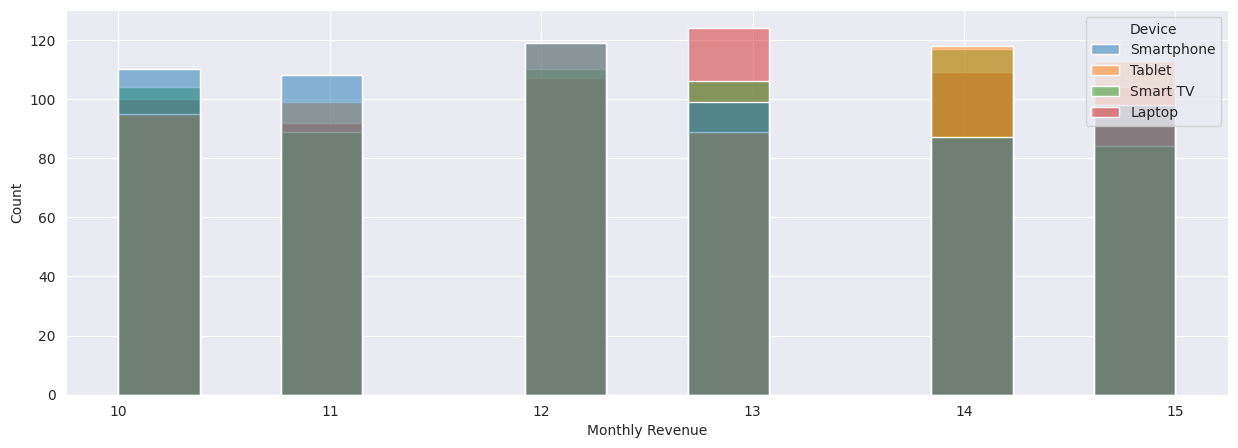

In [ ]:
sns.histplot(df, x='Monthly Revenue', hue='Device')

#### Heatmap

<ipython-input-41-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

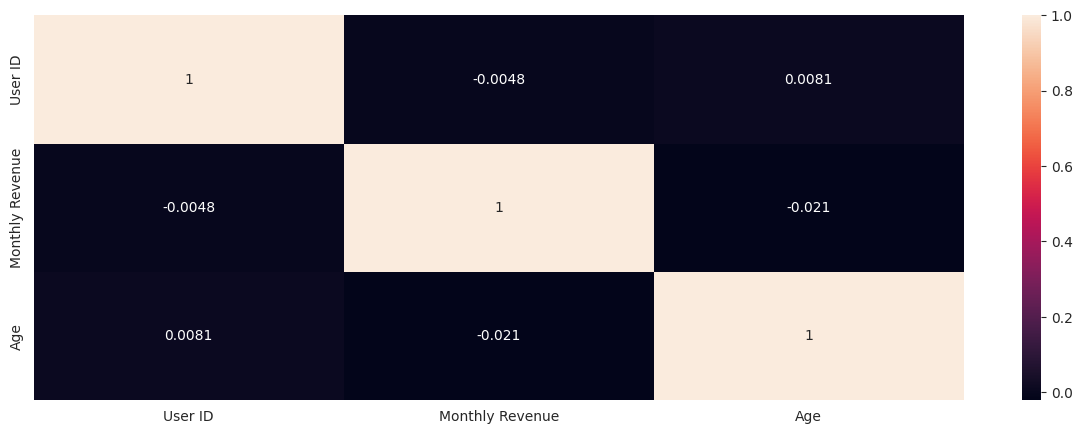

In [ ]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='Country', ylabel='Device'>

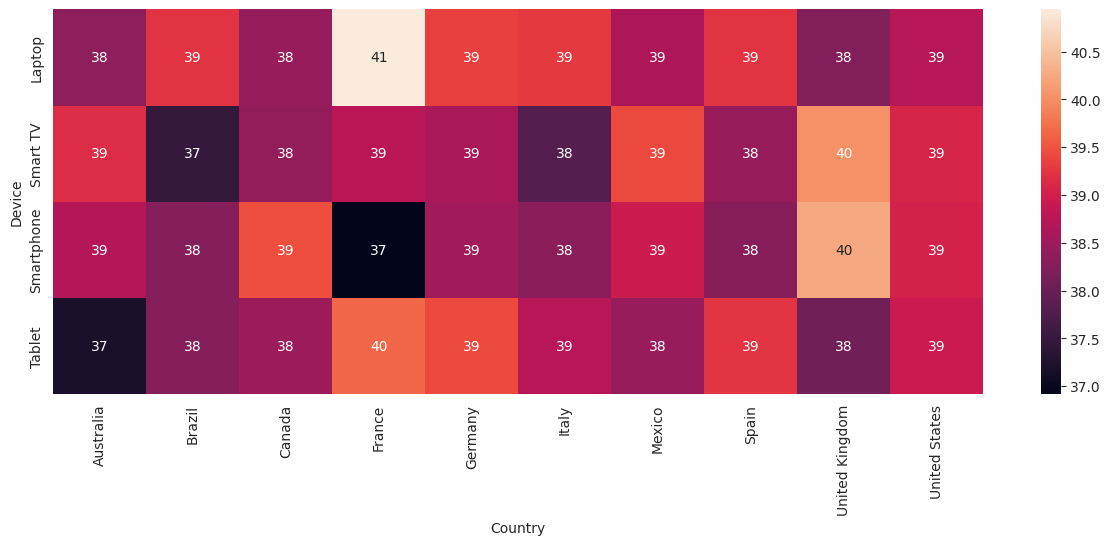

In [ ]:
pivot_table = df.pivot_table( index='Device',       # Rows
                columns='Country',      # Columns
                values='Age',        # Values to aggregate
                aggfunc='mean')       # Aggregation (mean)

sns.heatmap(pivot_table, annot=True)